In [44]:
import torch
import torch.nn as nn

In [45]:
class Model(nn.Module):
    def __init__(self, num):
        super().__init__()
        self.embed = nn.ParameterList([nn.Parameter(torch.randn(3, 3, 4, 4)) for _ in range(num)])
        self.mlp = nn.Linear(3,1)
    def forward(self,ids):
        emb = self.embed[ids]
        sum_emb = emb[0] + emb[1] + emb[2]
        return nn.functional.relu(self.mlp(sum_emb.permute(1,2,0)))

In [46]:
model = Model(3).train()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.8)

In [47]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.8
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [48]:
x = torch.randn(4,4,1)

In [49]:
init0,init1,init2 = model.state_dict()['embed.0'],model.state_dict()['embed.1'],model.state_dict()['embed.2']

In [50]:
init0,init1,init2

(tensor([[[[ 0.8832, -0.8454, -0.2774, -0.1486],
           [ 0.6446,  0.1140, -0.0077,  0.6939],
           [-1.0161,  1.1730, -0.6229, -1.0163],
           [-0.7283,  0.0232, -1.5811,  0.7126]],
 
          [[-1.1525, -1.0520,  0.4104, -0.7899],
           [ 1.2643,  1.3503, -1.6971, -0.5522],
           [ 0.7524, -1.6890, -2.2771, -0.8249],
           [ 0.2595,  0.7840,  0.4765,  0.1007]],
 
          [[-0.7628,  1.3500,  0.5972, -2.8213],
           [ 1.5695, -0.2688,  0.8353,  0.2907],
           [-1.4497, -0.5089,  1.0543,  0.1143],
           [ 0.5338,  0.0933, -0.0582, -0.4298]]],
 
 
         [[[ 0.1307, -0.8990, -0.2374,  0.8461],
           [ 0.8146,  0.7139,  1.6116, -1.2329],
           [-0.0566,  1.5042,  1.6916, -0.3209],
           [-2.1313, -0.6436, -0.2172,  0.2416]],
 
          [[-0.6942,  1.6710,  0.5351, -0.7564],
           [-0.6052,  0.7434,  0.0065,  0.0615],
           [ 0.4799,  0.1805, -1.5416, -2.1924],
           [ 0.7285,  1.5189,  0.8505, -0.4230]],
 
  

In [51]:
for i in range(20):
    preds = model(ids=1)
    # print(preds)
    loss = nn.functional.mse_loss(preds, x)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [52]:
loss

tensor(0.5947, grad_fn=<MseLossBackward0>)

In [53]:
af0,af1,af2 = model.state_dict()['embed.0'],model.state_dict()['embed.1'],model.state_dict()['embed.2']

In [54]:
af0, af1, af2

(tensor([[[[ 0.8832, -0.8454, -0.2774, -0.1486],
           [ 0.6446,  0.1140, -0.0077,  0.6939],
           [-1.0161,  1.1730, -0.6229, -1.0163],
           [-0.7283,  0.0232, -1.5811,  0.7126]],
 
          [[-1.1525, -1.0520,  0.4104, -0.7899],
           [ 1.2643,  1.3503, -1.6971, -0.5522],
           [ 0.7524, -1.6890, -2.2771, -0.8249],
           [ 0.2595,  0.7840,  0.4765,  0.1007]],
 
          [[-0.7628,  1.3500,  0.5972, -2.8213],
           [ 1.5695, -0.2688,  0.8353,  0.2907],
           [-1.4497, -0.5089,  1.0543,  0.1143],
           [ 0.5338,  0.0933, -0.0582, -0.4298]]],
 
 
         [[[ 0.1307, -0.8990, -0.2374,  0.8461],
           [ 0.8146,  0.7139,  1.6116, -1.2329],
           [-0.0566,  1.5042,  1.6916, -0.3209],
           [-2.1313, -0.6436, -0.2172,  0.2416]],
 
          [[-0.6942,  1.6710,  0.5351, -0.7564],
           [-0.6052,  0.7434,  0.0065,  0.0615],
           [ 0.4799,  0.1805, -1.5416, -2.1924],
           [ 0.7285,  1.5189,  0.8505, -0.4230]],
 
  

### The result shows that if we only use the embedding[0], go through the loss function, then only 0 embeddings parameters are changed. 

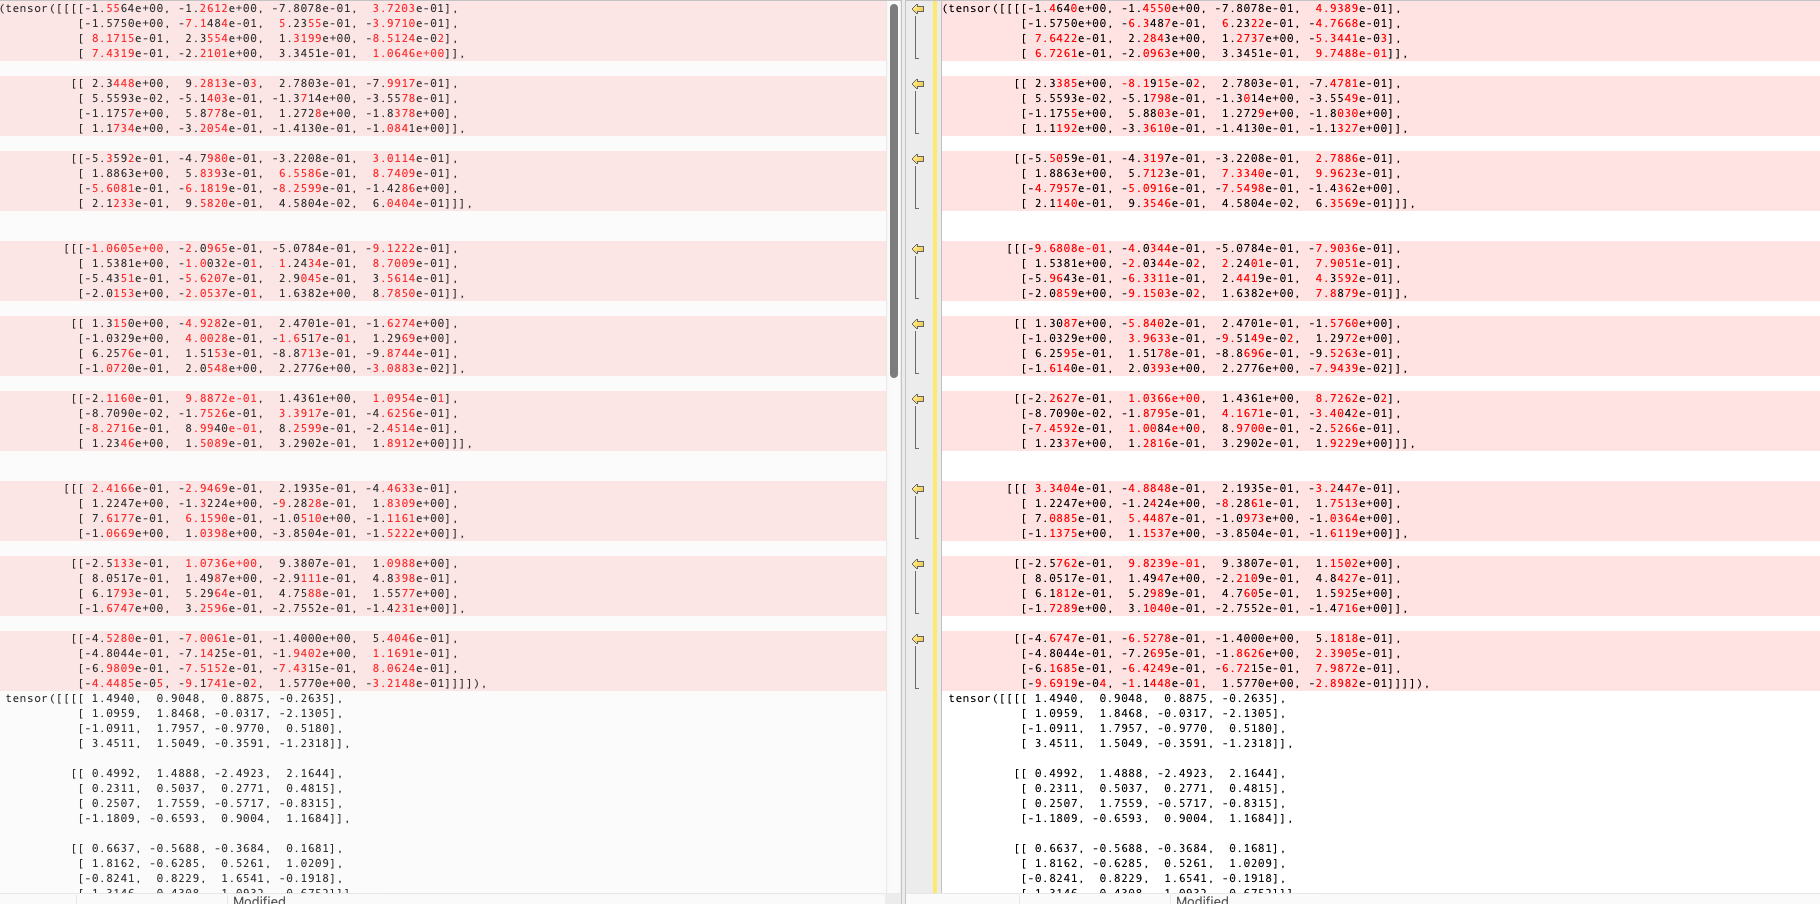